# Kaggle plotting course summary

##### 12.08.22, M.Falcusan

In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

### Data import

In [36]:
# All paths
fifa_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/fifa.csv"
spotify_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/spotify.csv"
museum_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/museum_visitors.csv"
flight_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/flight_delays.csv"
ign_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/ign_scores.csv"
insurance_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/insurance.csv"
iris_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/iris.csv"
candy_filepath = "C:/Users/mihai/Documents/Faculta/Data Projects/Kaggle data/candy.csv"


# Read the files into datasets
fifa_data = pd.read_csv(fifa_filepath, index_col="Date", parse_dates=True)
spotify_data = pd.read_csv(spotify_filepath, index_col="Date", parse_dates=True)
museum_data = pd.read_csv(museum_filepath, index_col = "Date", parse_dates = True)        # parse dates really cool
flight_data = pd.read_csv(flight_filepath, index_col="Month")
ign_data = pd.read_csv(ign_filepath, index_col = "Platform", encoding="utf-8-sig")
insurance_data = pd.read_csv(insurance_filepath)
candy_data = pd.read_csv(candy_filepath, index_col='id')
iris_data = pd.read_csv(iris_filepath, index_col="Id")

# 1. Line plots

### 1.1 Fifa Data

In [3]:
fifa_data.head(10)

,ARG,BRA,ESP,FRA,GER,ITA
Date,,,,,,
1993-08-08,5.0,8.0,13.0,12.0,1.0,2.0
1993-09-23,12.0,1.0,14.0,7.0,5.0,2.0
1993-10-22,9.0,1.0,7.0,14.0,4.0,3.0
1993-11-19,9.0,4.0,7.0,15.0,3.0,1.0
1993-12-23,8.0,3.0,5.0,15.0,1.0,2.0
1994-02-15,9.0,2.0,6.0,14.0,1.0,7.0
1994-03-15,8.0,2.0,6.0,15.0,1.0,11.0
1994-04-19,10.0,1.0,7.0,15.0,2.0,13.0
1994-05-17,6.0,1.0,9.0,17.0,2.0,16.0


<AxesSubplot:xlabel='Date'>

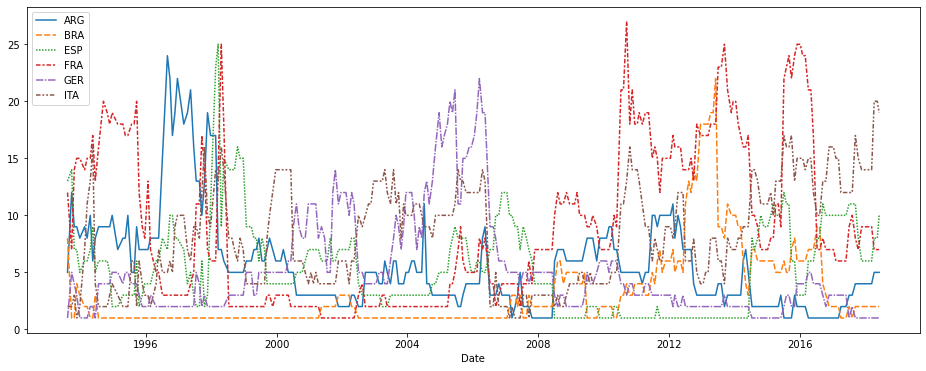

In [4]:
# Set the width and height of the figure
plt.figure(figsize=(16,6))

# Line chart showing how FIFA rankings evolved over time 
sns.lineplot(data=fifa_data)

 ##### Considering only the years represented in the dataset, which countries spent at least 5 consecutive years in the #1 ranked spot? -> Brasil

### 1.2 Spotify dataset

In [5]:
spotify_data.tail(5)

,Shape of You,Despacito,Something Just Like This,HUMBLE.,Unforgettable
Date,,,,,
2018-01-05,4492978,3450315.0,2408365.0,2685857.0,2869783.0
2018-01-06,4416476,3394284.0,2188035.0,2559044.0,2743748.0
2018-01-07,4009104,3020789.0,1908129.0,2350985.0,2441045.0
2018-01-08,4135505,2755266.0,2023251.0,2523265.0,2622693.0
2018-01-09,4168506,2791601.0,2058016.0,2727678.0,2627334.0


### Overlapping line plots and plotting multiple figures from same code chunk

<AxesSubplot:xlabel='Date', ylabel='Shape of You'>

<Figure size 3600x1440 with 0 Axes>

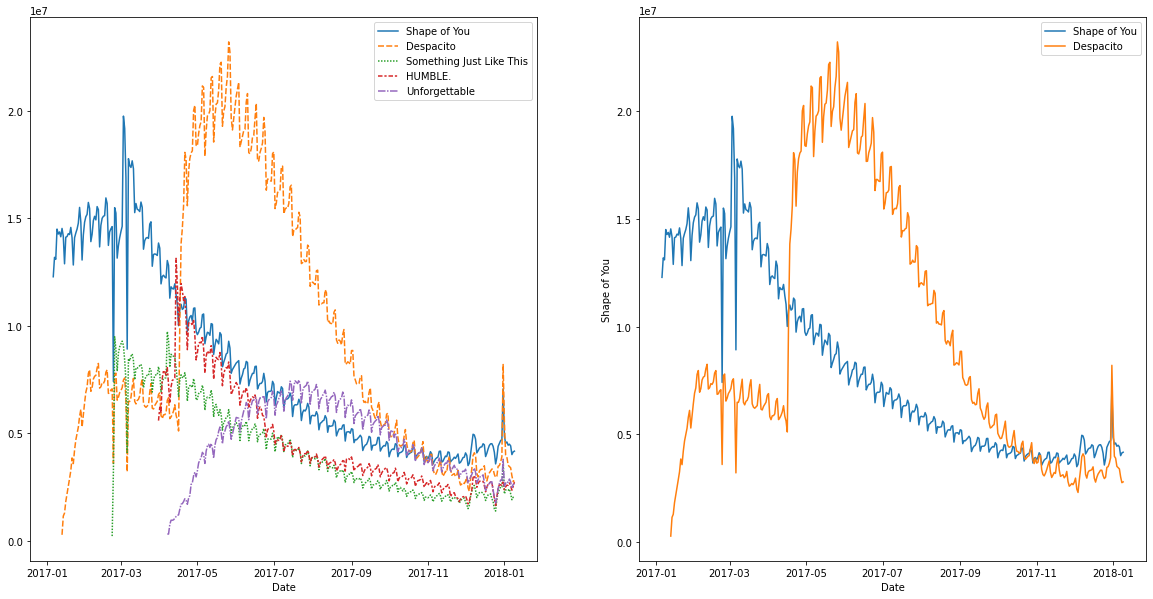

In [6]:
plt.figure(figsize = (50,20))
fig, ax = plt.subplots(1, 2, figsize = (20,10))       # equivalent of par(mfrow) and plt.figure(figsize)

sns.lineplot(data=spotify_data, ax=ax[0])

#subset of data
sns.lineplot(data=spotify_data['Shape of You'], label="Shape of You", ax=ax[1]) 
sns.lineplot(data=spotify_data['Despacito'], label="Despacito", ax=ax[1]) 


### 1.3 Museum dataset

In [7]:
#sns.lineplot?
# Museum Dataset
museum_data.head(5)

,Avila Adobe,Firehouse Museum,Chinese American Museum,America Tropical Interpretive Center
Date,,,,
2014-01-01,24778,4486,1581,6602
2014-02-01,18976,4172,1785,5029
2014-03-01,25231,7082,3229,8129
2014-04-01,26989,6756,2129,2824
2014-05-01,36883,10858,3676,10694


<AxesSubplot:xlabel='Date', ylabel='America Tropical Interpretive Center'>

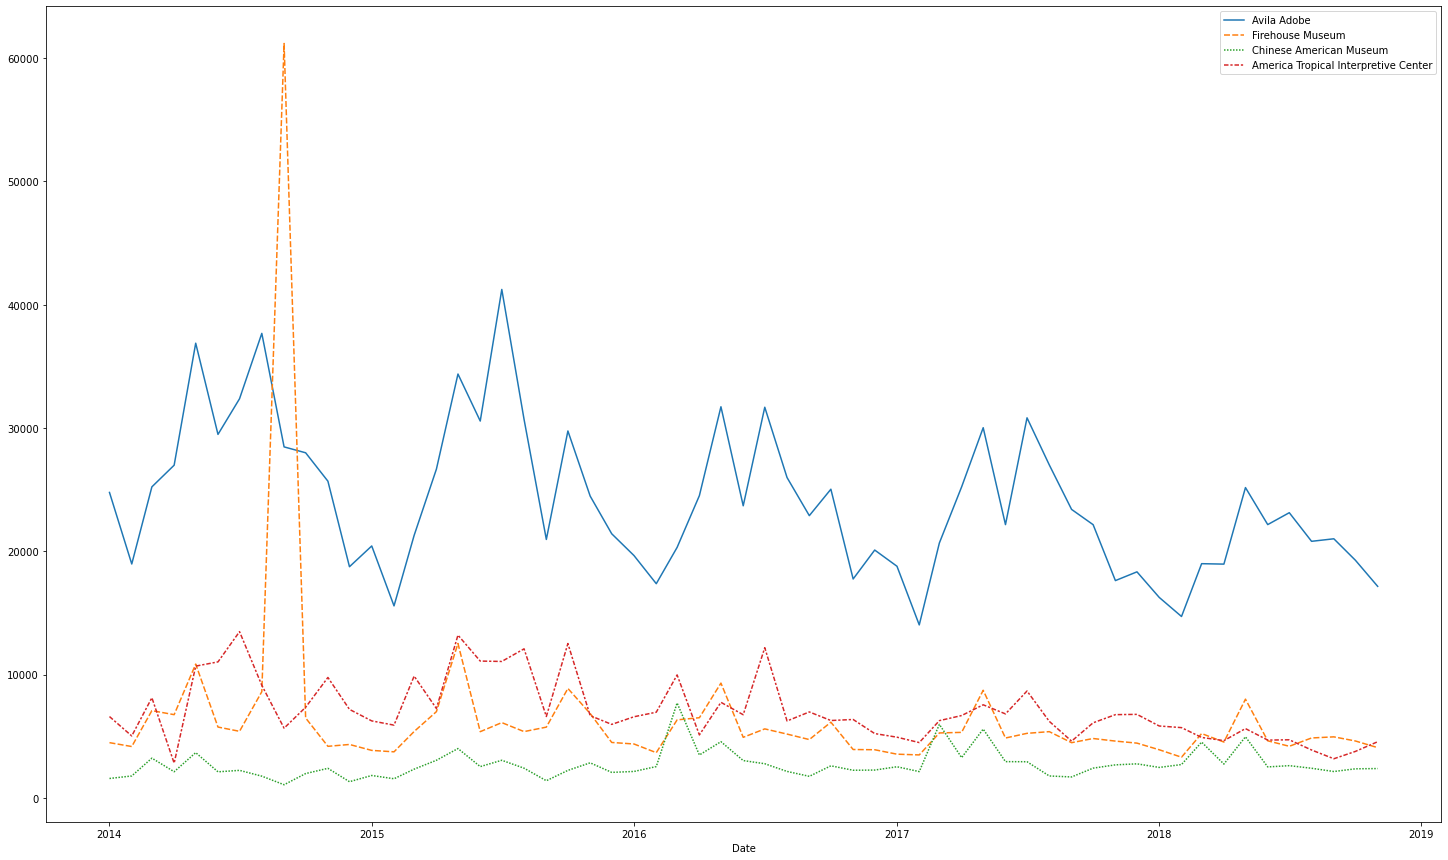

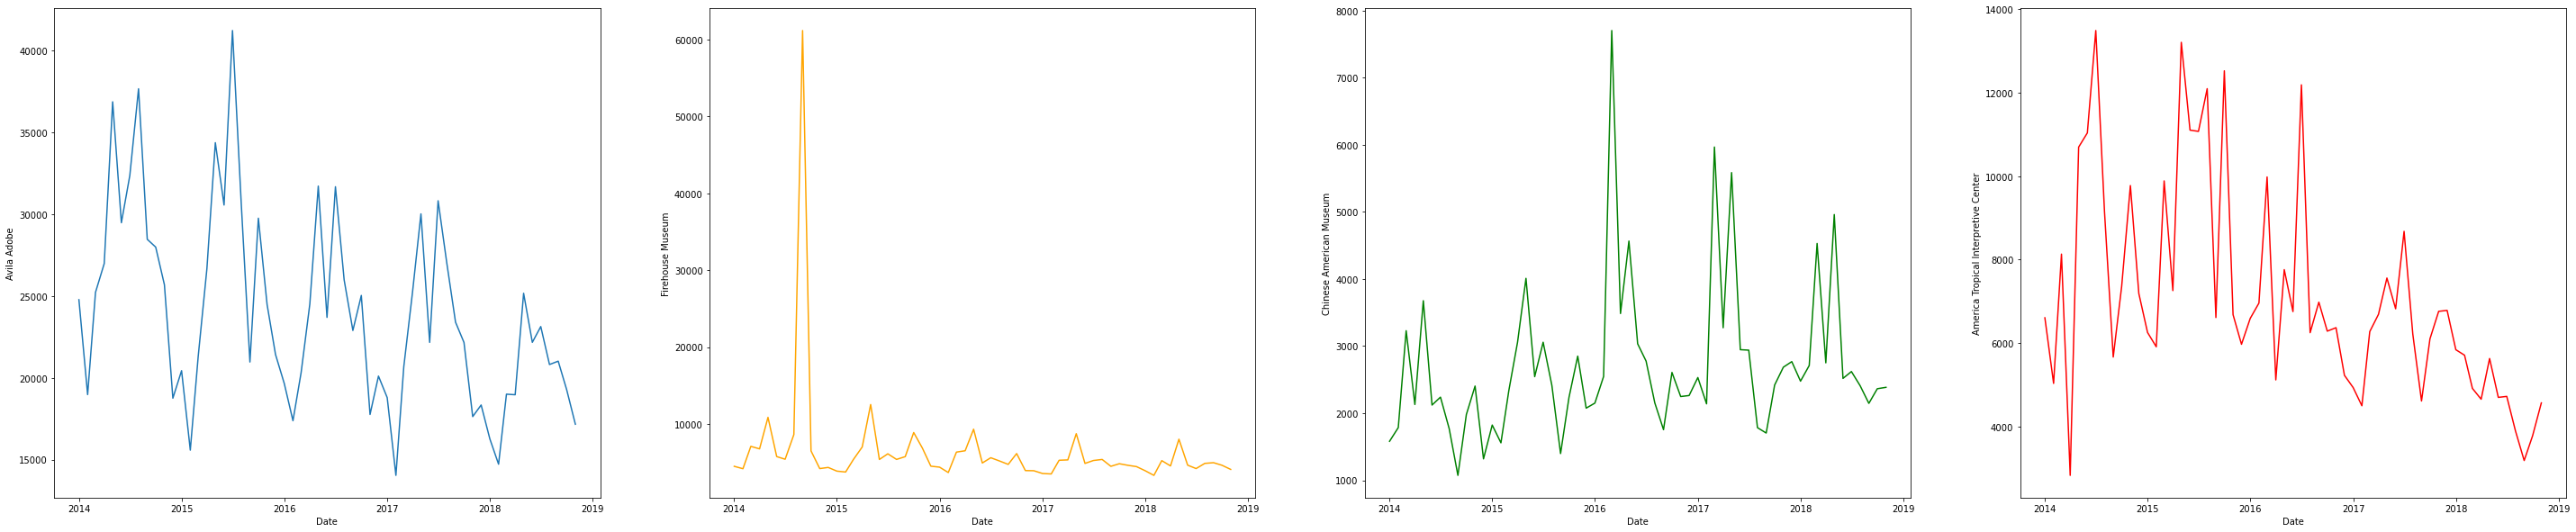

In [8]:
fig, axis = plt.subplots(1,1, figsize = (25,15)) # width, height
# also, ax is now called axis to not interfere with the global ax of spotify data
sns.lineplot(data = museum_data)
fig, axis = plt.subplots(1,4, figsize = (50,10)) # width, height
sns.lineplot(data = museum_data['Avila Adobe'], ax=axis[0])
sns.lineplot(data = museum_data['Firehouse Museum'], ax=axis[1], color ='orange' )
sns.lineplot(data = museum_data['Chinese American Museum'], ax=axis[2], color = 'green')
sns.lineplot(data = museum_data['America Tropical Interpretive Center'], ax=axis[3], color = 'red')

#### Joint plot shows relations (Firehouse museum event seems to be worthwile to repeat next year) while single plots illustrate periodicity of visitors better

# 2. Bar Charts and Heatmaps

## 2.1 Bar Charts

In [9]:
# US flight delay dataset
flight_data.head(5)

,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
Month,,,,,,,,,,,,,,
1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


Text(0, 0.5, 'Arrival delay (in minutes)')

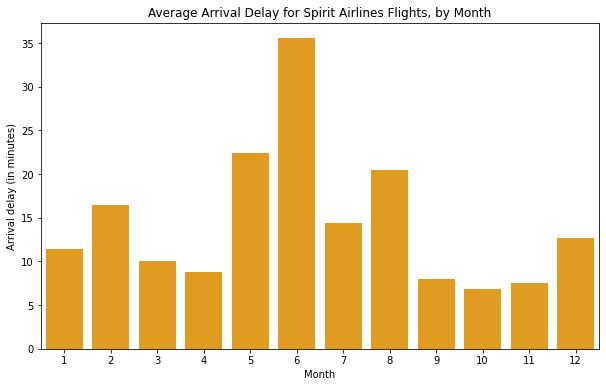

In [10]:
plt.figure(figsize=(10,6))
plt.title("Average Arrival Delay for Spirit Airlines Flights, by Month")

sns.barplot(x=flight_data.index, y=flight_data['NK'], color='orange')

plt.ylabel("Arrival delay (in minutes)")

## 2.2 Heatmaps

<AxesSubplot:ylabel='Month'>

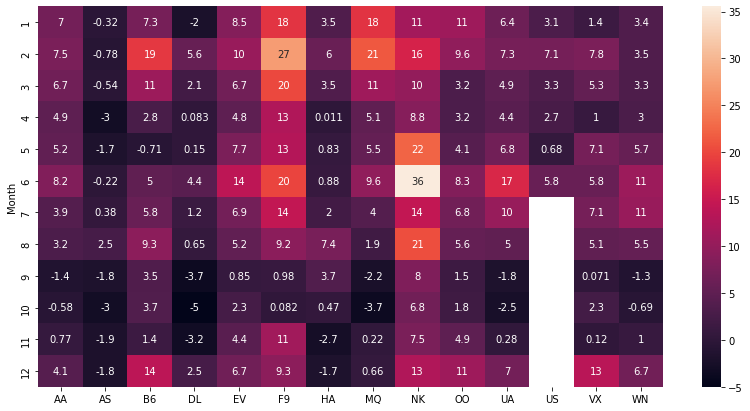

In [11]:
# Heatmap showing average arrival delay for each airline by month
plt.figure(figsize = (14,7))
sns.heatmap(data=flight_data, annot=True)

In [12]:
#sns.heatmap?

### 2.3 IGN dataset & Practice

In [13]:
ign_data

,Action,"Action, Adventure",Adventure,Fighting,Platformer,Puzzle,RPG,Racing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
Dreamcast,6.882857,7.511111,6.281818,8.200000,8.340000,8.088889,7.700000,7.042500,7.616667,7.628571,7.272222,6.433333
Game Boy Advance,6.373077,7.507692,6.057143,6.226316,6.970588,6.532143,7.542857,6.657143,6.444444,6.928571,6.694444,7.175000
Game Boy Color,6.272727,8.166667,5.307692,4.500000,6.352941,6.583333,7.285714,5.897436,4.500000,5.900000,5.790698,7.400000
GameCube,6.532584,7.608333,6.753846,7.422222,6.665714,6.133333,7.890909,6.852632,6.981818,8.028571,7.481319,7.116667
Nintendo 3DS,6.670833,7.481818,7.414286,6.614286,7.503448,8.000000,7.719231,6.900000,7.033333,7.700000,6.388889,7.900000
Nintendo 64,6.649057,8.250000,7.000000,5.681250,6.889655,7.461538,6.050000,6.939623,8.042857,5.675000,6.967857,6.900000
Nintendo DS,5.903608,7.240000,6.259804,6.320000,6.840000,6.604615,7.222619,6.038636,6.965217,5.874359,5.936667,6.644737
Nintendo DSi,6.827027,8.500000,6.090909,7.500000,7.250000,6.810526,7.166667,6.563636,6.500000,5.195652,5.644444,6.566667
PC,6.805791,7.334746,7.136798,7.166667,7.410938,6.924706,7.759930,7.032418,7.084878,7.104889,6.902424,7.310207


#### Indexing and Searching

Text(0.5, 1.0, 'Most Popular Category Overall')

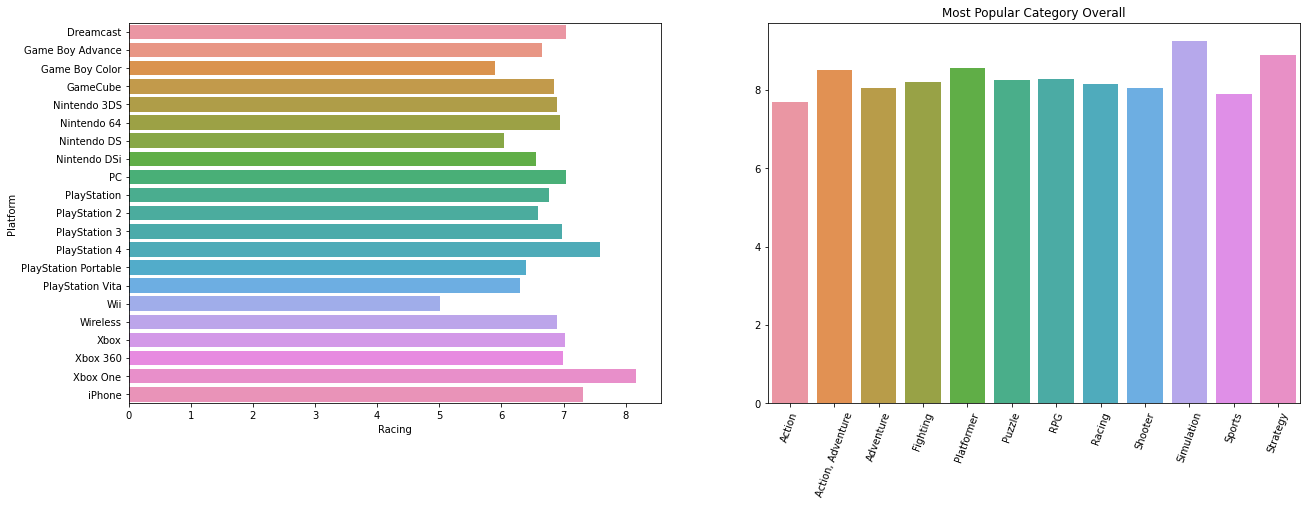

In [14]:
high_score = 'NA'
worst_genre = 'Na'
#temp = np.array(ign_data)
#np.argmax(temp)


fig, axis1 = plt.subplots(1,2, figsize = (21,7))
plt.title("Most Popular Game Category by COnsole")
sns.barplot(x = ign_data["Racing"] , y = ign_data.index, ax = axis1[0])

sns.barplot(x=ign_data.max().index, y=ign_data.max(), ax = axis1[1])
plt.xticks(rotation=70)
plt.title("Most Popular Category Overall")
# TODOS:
# Most popular category over each group
#sns.scatterplot(x = ign_data["Simulation"], y=ign_data.max().max())
#sns.barplot?

<AxesSubplot:ylabel='Platform'>

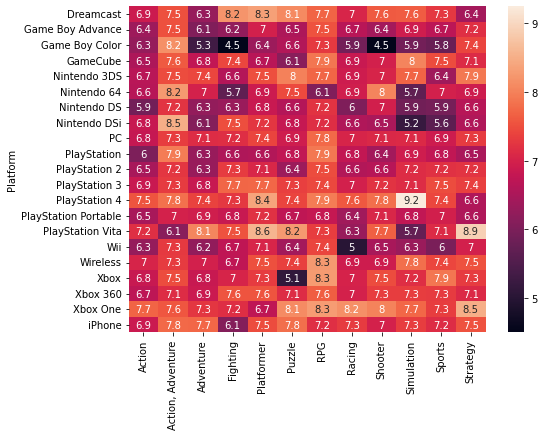

In [15]:
plt.figure(figsize=(8, 6))
sns.heatmap(ign_data, annot = True)

# 3. Scatterplots

## 3.1 Insurance price dataset

In [16]:
insurance_data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<AxesSubplot:xlabel='bmi', ylabel='charges'>

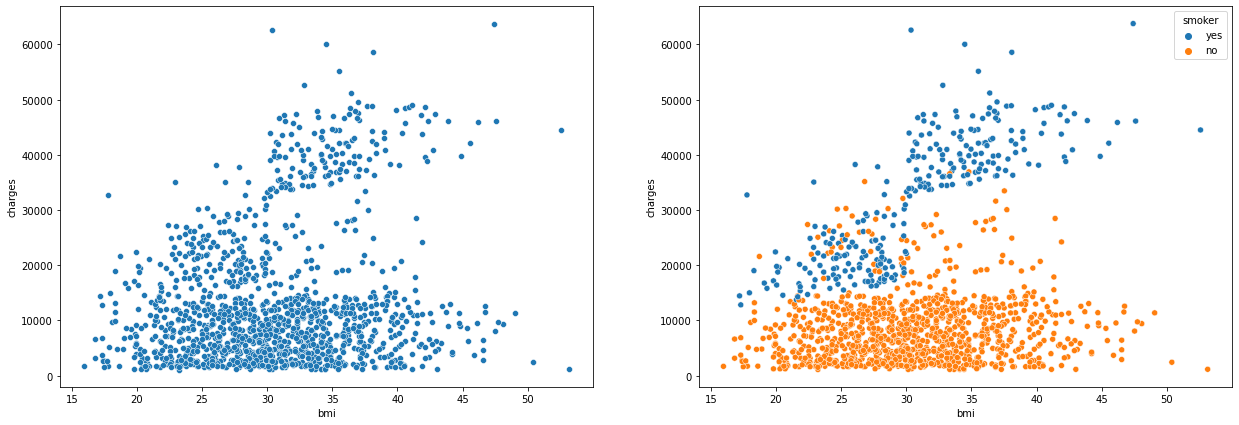

In [17]:
fig, axis2 = plt.subplots(1,2, figsize = (21,7))
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], ax = axis2[0])
sns.scatterplot(x=insurance_data['bmi'], y=insurance_data['charges'], hue=insurance_data['smoker'], ax = axis2[1])

###### color-coding categorial variable can do a great job in explaining the data

<AxesSubplot:title={'center':'Relationship between BMI and Charges'}, xlabel='bmi', ylabel='charges'>

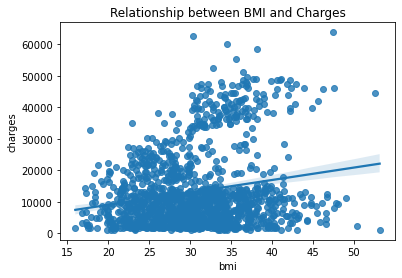

In [18]:
plt.title("Relationship between BMI and Charges")
sns.regplot(x=insurance_data['bmi'], y=insurance_data['charges'])

In [19]:
#sns.lmplot?

###### Plotting the regression line can make linear relationships visible

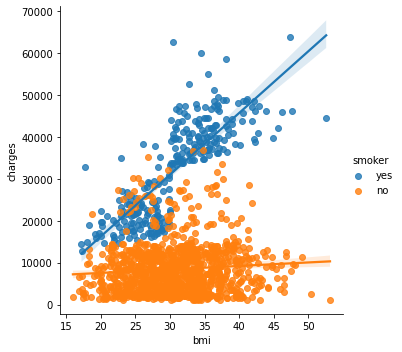

In [20]:
# plt.title("Relationship between BMI and Charges for Separate Smoking groups")
# TODO: how to set lmplot title?
sns.lmplot(x="bmi", y="charges", hue="smoker", data=insurance_data)

##### separating by category smoke reveals the influence of the variable smoke on charges

### 3.2 Swarm plot

<AxesSubplot:xlabel='smoker', ylabel='charges'>

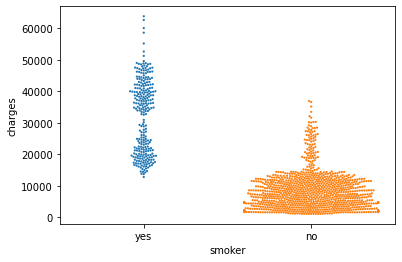

In [34]:
sns.swarmplot(x=insurance_data['smoker'],
              y=insurance_data['charges'], size = 2.2)

###### avoid drawing errors by setting the size of the markers

### 3.3 Chocolate dataset and Practice

In [37]:
candy_data.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
id,,,,,,,,,,,,,
0,100 Grand,Yes,No,Yes,No,No,Yes,No,Yes,No,0.732,0.860,66.971725
1,3 Musketeers,Yes,No,No,No,Yes,No,No,Yes,No,0.604,0.511,67.602936
2,Air Heads,No,Yes,No,No,No,No,No,No,No,0.906,0.511,52.341465
3,Almond Joy,Yes,No,No,Yes,No,No,No,Yes,No,0.465,0.767,50.347546
4,Baby Ruth,Yes,No,Yes,Yes,Yes,No,No,Yes,No,0.604,0.767,56.914547


<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

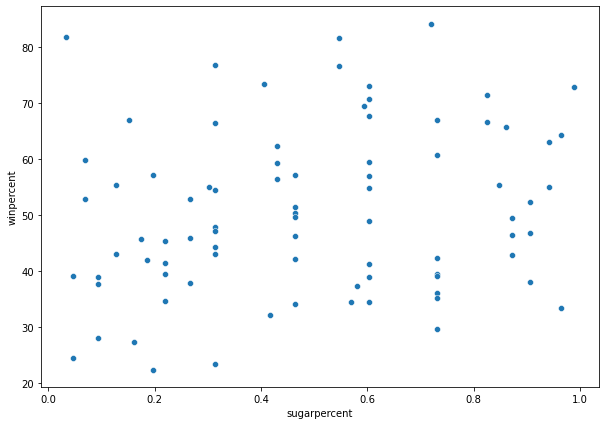

In [38]:
plt.figure(figsize = (10,7))# Your code here
sns.scatterplot(x = candy_data['sugarpercent'], y = candy_data['winpercent'])

##### role of sugar in explaining winpercent is not directly visible with a simple scatterplot

<AxesSubplot:xlabel='sugarpercent', ylabel='winpercent'>

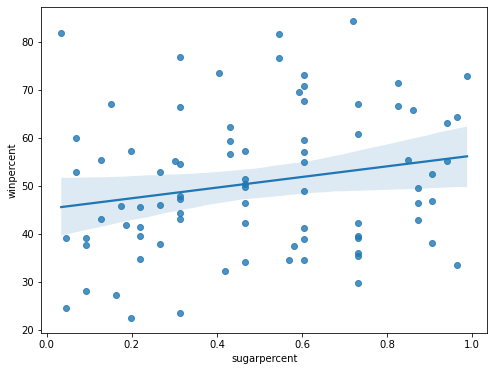

In [40]:
plt.figure(figsize=(8, 6))
sns.regplot(x = candy_data['sugarpercent'], y = candy_data['winpercent'])

##### slight positive relation between sugar and winpercent is now visiblle

<AxesSubplot:xlabel='pricepercent', ylabel='winpercent'>

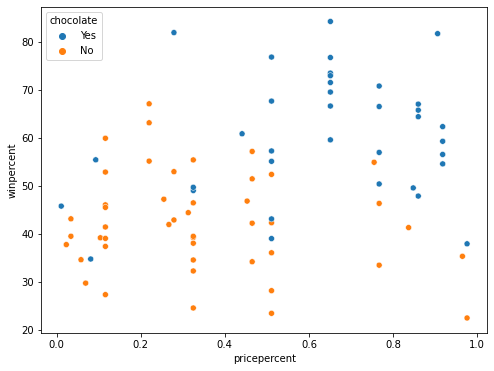

In [41]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x = candy_data['pricepercent'], y = candy_data['winpercent'], hue = candy_data['chocolate'])# Your code here

###### separating by chocolate reveals that candy containing chocolate is on average more expensive

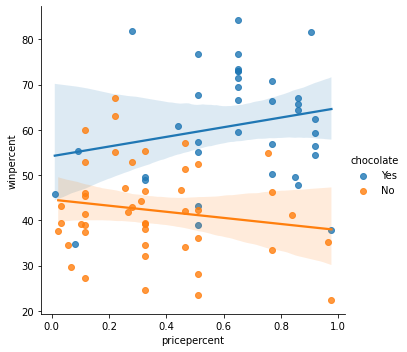

In [42]:
sns.lmplot(x = 'pricepercent', y = 'winpercent', hue = 'chocolate', data = candy_data)# Your code here


###### current dataset suggests that candy with chocolate is more popular when it's more expensive while candy w/0 chocolate when it's cheaper

# 4. Distributions

### 4.1 Iris dataset

In [22]:
iris_data.head()

,Sepal Length (cm),Sepal Width (cm),Petal Length (cm),Petal Width (cm),Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### 4.2 Histogramms

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

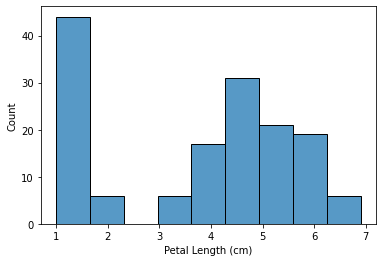

In [23]:
sns.histplot(iris_data['Petal Length (cm)'])

### 4.3 KDE Plot

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Density'>

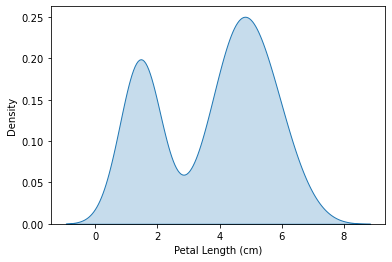

In [24]:
sns.kdeplot(data=iris_data['Petal Length (cm)'], shade=True)

### 4.4 2D KDE Plot

In [25]:
#sns.jointplot?

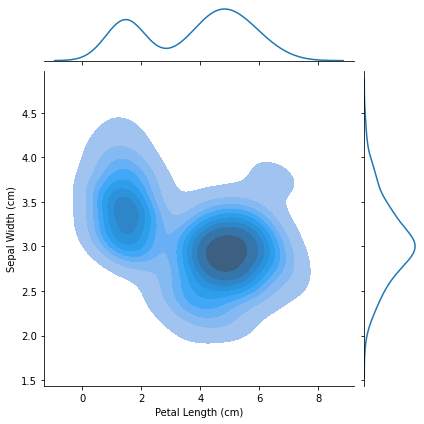

In [26]:
# 2D KDE plot
sns.jointplot(x=iris_data['Petal Length (cm)'], y=iris_data['Sepal Width (cm)'], kind="kde", shade = True)

### 4.5 Same but in color

<AxesSubplot:xlabel='Petal Length (cm)', ylabel='Count'>

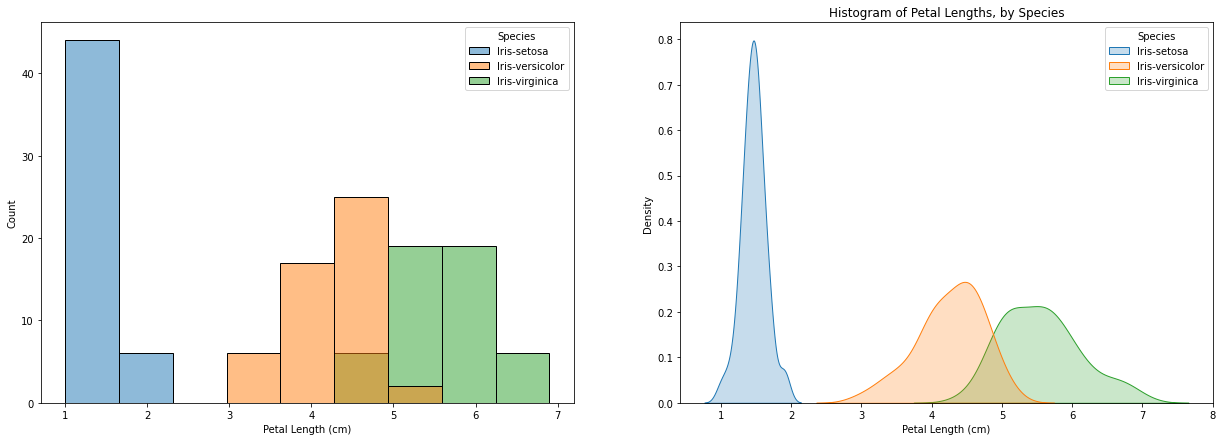

In [27]:
fig, axis3 = plt.subplots(1,2, figsize = (21,7))

sns.kdeplot(data=iris_data, x='Petal Length (cm)', hue='Species', shade=True, ax = axis3[1])
plt.title("Distribution of Petal Lengths, by Species")
plt.title("Histogram of Petal Lengths, by Species")
sns.histplot(data=iris_data, x='Petal Length (cm)', hue='Species', ax = axis3[0])





# 5 Conclusion

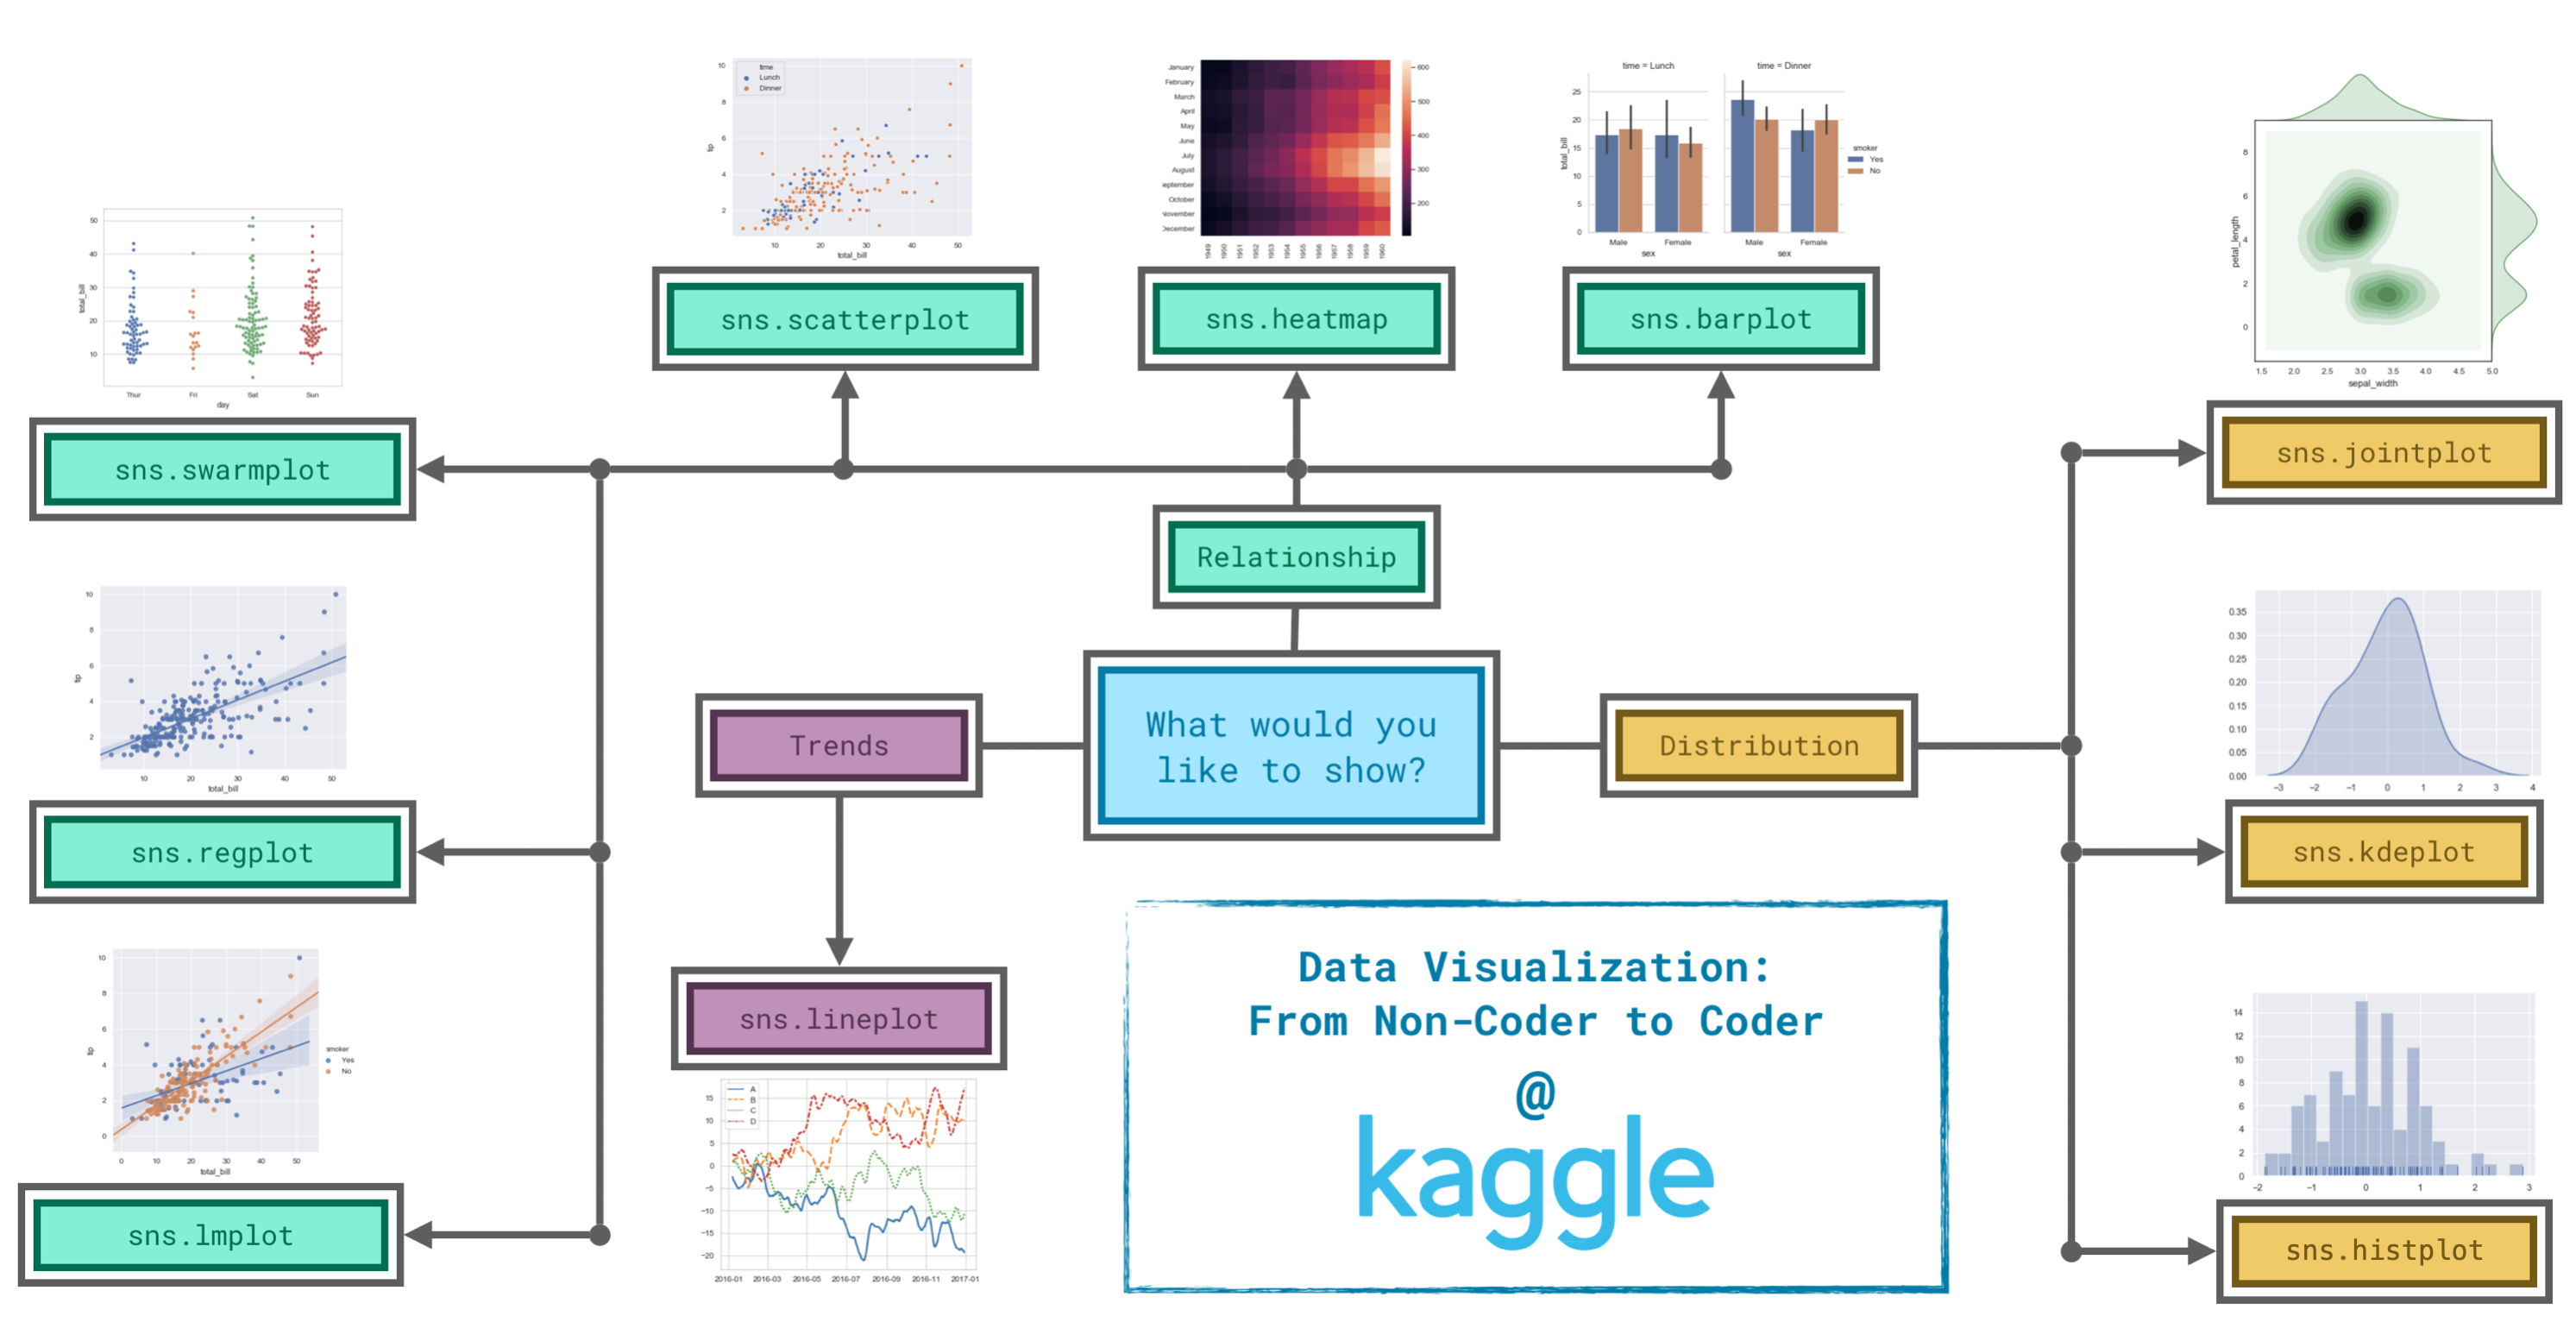

##### seaborn is gr8